# Data Extraction and Transformation

In [4]:
import yaml
import pandas as pd
import glob
import os
from collections import defaultdict

DATA_FOLDER = r"C:\Users\Lenovo\Desktop\Data Driven Stock Analysis\data"

yaml_files = glob.glob(f"{DATA_FOLDER}/**/*.yaml", recursive=True) + \
             glob.glob(f"{DATA_FOLDER}/**/*.yml", recursive=True)

print(f" Total YAML Files Found: {len(yaml_files)}")

symbol_data = defaultdict(list)

for file_path in yaml_files:
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            data = yaml.safe_load(f)
            
            print(f"\n📄 Processing: {file_path}")
            print(f" Data type: {type(data)}")
            
            if data:
                print(f" Sample data: {str(data)[:200]}...")
            
            folder_parts = file_path.split(os.sep)
            month = folder_parts[-2] if len(folder_parts) >= 2 else "Unknown"
            
            if isinstance(data, dict):
                if data:
                    data['_month'] = month
                    data['_source_file'] = file_path
                    
                    symbol_keys = ['symbol', 'Symbol', 'SYMBOL', 'ticker', 'Ticker', 'TICKER', 'name', 'Name', 'NAME']
                    symbol = None
                    
                    for key in symbol_keys:
                        if key in data:
                            symbol = data[key]
                            break
                    
                    if not symbol:
                        symbol = f"Unknown_{len(symbol_data)}"
                    
                    symbol_data[symbol].append(data)
                    print(f" Added to symbol: {symbol}")
                    
            elif isinstance(data, list):
                for record in data:
                    if isinstance(record, dict) and record:
                        record['_month'] = month
                        record['_source_file'] = file_path
                        
                        symbol_keys = ['symbol', 'Symbol', 'SYMBOL', 'ticker', 'Ticker', 'TICKER', 'name', 'Name', 'NAME']
                        symbol = None
                        
                        for key in symbol_keys:
                            if key in record:
                                symbol = record[key]
                                break
                        
                        if not symbol:
                            symbol = f"Unknown_{len(symbol_data)}"
                        
                        symbol_data[symbol].append(record)
                        print(f" Added to symbol: {symbol}")
                        
    except Exception as e:
        print(f" Error reading {file_path}: {e}")

print(f"\nSymbols found: {list(symbol_data.keys())}")

output_dir = "symbol_csv_files"
os.makedirs(output_dir, exist_ok=True)

print(f"\nCreating symbol-wise CSV files...")

files_created = 0
for symbol, records in symbol_data.items():
    if records:
        df = pd.DataFrame(records)
        
        csv_filename = f"{output_dir}/{symbol}.csv"
        df.to_csv(csv_filename, index=False)
        print(f"Created: {symbol}.csv with {len(df)} records")
        files_created += 1

print(f"\n🎯 TOTAL SYMBOL CSV FILES CREATED: {files_created}")

if files_created > 0:
    all_records = []
    for symbol, records in symbol_data.items():
        all_records.extend(records)
    
    combined_df = pd.DataFrame(all_records)
    combined_df.to_csv("all_stocks_combined.csv", index=False)
    print(f"Combined file created: all_stocks_combined.csv with {len(combined_df)} records")
else:
    print("No data found to create combined file")

print("\n" + "="*50)
print("PROJECT REQUIREMENTS CHECK:")
print("="*50)
print(f"YAML files processed: {len(yaml_files)}")
print(f"Symbol-wise CSV files created: {files_created}")
print(f"Output directory: {output_dir}/")
print("="*50)

 Total YAML Files Found: 284

📄 Processing: C:\Users\Lenovo\Desktop\Data Driven Stock Analysis\data\2023-10\2023-10-03_05-30-00.yaml
 Data type: <class 'list'>
 Sample data: [{'Ticker': 'SBIN', 'close': 602.95, 'date': '2023-10-03 05:30:00', 'high': 604.9, 'low': 589.6, 'month': '2023-10', 'open': 596.6, 'volume': 15322196}, {'Ticker': 'BAJFINANCE', 'close': 7967.6, 'date...
 Added to symbol: SBIN
 Added to symbol: BAJFINANCE
 Added to symbol: TITAN
 Added to symbol: ITC
 Added to symbol: TCS
 Added to symbol: LT
 Added to symbol: TATACONSUM
 Added to symbol: RELIANCE
 Added to symbol: HCLTECH
 Added to symbol: JSWSTEEL
 Added to symbol: ULTRACEMCO
 Added to symbol: POWERGRID
 Added to symbol: INFY
 Added to symbol: TRENT
 Added to symbol: BHARTIARTL
 Added to symbol: TATAMOTORS
 Added to symbol: WIPRO
 Added to symbol: TECHM
 Added to symbol: NTPC
 Added to symbol: HINDUNILVR
 Added to symbol: APOLLOHOSP
 Added to symbol: M&M
 Added to symbol: GRASIM
 Added to symbol: ICICIBANK
 Added

## Cheking Null values

In [12]:
symbol_files = os.listdir('symbol_csv_files')

for symbol_file in symbol_files[:50]:  
    print(f"\n Checking: {symbol_file}")
    df = pd.read_csv(f'symbol_csv_files/{symbol_file}')
    print(df.isnull().sum())


 Checking: ADANIENT.csv
Ticker          0
close           0
date            0
high            0
low             0
month           0
open            0
volume          0
_month          0
_source_file    0
dtype: int64

 Checking: ADANIPORTS.csv
Ticker          0
close           0
date            0
high            0
low             0
month           0
open            0
volume          0
_month          0
_source_file    0
dtype: int64

 Checking: APOLLOHOSP.csv
Ticker          0
close           0
date            0
high            0
low             0
month           0
open            0
volume          0
_month          0
_source_file    0
dtype: int64

 Checking: ASIANPAINT.csv
Ticker          0
close           0
date            0
high            0
low             0
month           0
open            0
volume          0
_month          0
_source_file    0
dtype: int64

 Checking: AXISBANK.csv
Ticker          0
close           0
date            0
high            0
low             0
month  

## Checking Dulicate Values

In [17]:
symbol_files = os.listdir('symbol_csv_files')

for symbol_file in symbol_files[:50]:  
    print(f"\n Checking: {symbol_file}")
    df = pd.read_csv(f'symbol_csv_files/{symbol_file}')
    print(df.duplicated().sum())


 Checking: ADANIENT.csv
0

 Checking: ADANIPORTS.csv
0

 Checking: APOLLOHOSP.csv
0

 Checking: ASIANPAINT.csv
0

 Checking: AXISBANK.csv
0

 Checking: BAJAJ-AUTO.csv
0

 Checking: BAJAJFINSV.csv
0

 Checking: BAJFINANCE.csv
0

 Checking: BEL.csv
0

 Checking: BHARTIARTL.csv
0

 Checking: BPCL.csv
0

 Checking: BRITANNIA.csv
0

 Checking: CIPLA.csv
0

 Checking: COALINDIA.csv
0

 Checking: DRREDDY.csv
0

 Checking: EICHERMOT.csv
0

 Checking: GRASIM.csv
0

 Checking: HCLTECH.csv
0

 Checking: HDFCBANK.csv
0

 Checking: HDFCLIFE.csv
0

 Checking: HEROMOTOCO.csv
0

 Checking: HINDALCO.csv
0

 Checking: HINDUNILVR.csv
0

 Checking: ICICIBANK.csv
0

 Checking: INDUSINDBK.csv
0

 Checking: INFY.csv
0

 Checking: ITC.csv
0

 Checking: JSWSTEEL.csv
0

 Checking: KOTAKBANK.csv
0

 Checking: LT.csv
0

 Checking: M&M.csv
0

 Checking: MARUTI.csv
0

 Checking: NESTLEIND.csv
0

 Checking: NTPC.csv
0

 Checking: ONGC.csv
0

 Checking: POWERGRID.csv
0

 Checking: RELIANCE.csv
0

 Checking: SBILIFE.

# Data Analysis and Visualization

In [5]:
import pandas as pd
import numpy as np
import os

symbol_files = [f for f in os.listdir('symbol_csv_files') if f.endswith('.csv')]
print(f" Total Stocks: {len(symbol_files)}")

def calculate_yearly_return(symbol):
    try:
        df = pd.read_csv(f'symbol_csv_files/{symbol}')
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
            df = df.sort_values('date')
        if len(df) > 1 and 'close' in df.columns:
            start_price = df['close'].iloc[0]
            end_price = df['close'].iloc[-1]
            yearly_return = (end_price - start_price) / start_price
            return yearly_return
    except Exception as e:
        print(f"Error with {symbol}: {e}")
    return 0

yearly_returns = {}
for symbol_file in symbol_files:
    symbol = symbol_file.replace('.csv', '')
    return_pct = calculate_yearly_return(symbol_file)
    yearly_returns[symbol] = return_pct

returns_df = pd.DataFrame(list(yearly_returns.items()), columns=['Symbol', 'Yearly_Return'])

top_10_green = returns_df.nlargest(10, 'Yearly_Return')
top_10_loss = returns_df.nsmallest(10, 'Yearly_Return')

green_stocks = len(returns_df[returns_df['Yearly_Return'] > 0])
red_stocks = len(returns_df[returns_df['Yearly_Return'] <= 0])

all_prices = []
all_volumes = []

for symbol_file in symbol_files:
    df = pd.read_csv(f'symbol_csv_files/{symbol_file}')
    if 'close' in df.columns:
        all_prices.extend(df['close'].dropna().tolist())
    if 'volume' in df.columns:
        all_volumes.extend(df['volume'].dropna().tolist())

avg_price = np.mean(all_prices) if all_prices else 0
avg_volume = np.mean(all_volumes) if all_volumes else 0

print("\n" + "="*60)
print(" TOP 10 GREEN STOCKS")
print("="*60)
top_10_green_styled = top_10_green.copy()
top_10_green_styled['Return (%)'] = (top_10_green_styled['Yearly_Return'] * 100).round(2).astype(str) + '%'
top_10_green_styled = top_10_green_styled[['Symbol', 'Return (%)']]
print(top_10_green_styled.to_string(index=False))

print("\n" + "="*60)
print(" TOP 10 LOSS STOCKS")  
print("="*60)
top_10_loss_styled = top_10_loss.copy()
top_10_loss_styled['Return (%)'] = (top_10_loss_styled['Yearly_Return'] * 100).round(2).astype(str) + '%'
top_10_loss_styled = top_10_loss_styled[['Symbol', 'Return (%)']]
print(top_10_loss_styled.to_string(index=False))

print("\n" + "="*60)
print(" MARKET SUMMARY")
print("="*60)
summary_data = {
    'Metric': ['Total Stocks', 'Green Stocks', 'Red Stocks', 'Average Price', 'Average Volume'],
    'Value': [
        len(symbol_files),
        f"{green_stocks} ({green_stocks/len(symbol_files)*100:.1f}%)",
        f"{red_stocks} ({red_stocks/len(symbol_files)*100:.1f}%)", 
        f"₹{avg_price:.2f}",
        f"{avg_volume:,.0f}"
    ]
}
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

 Total Stocks: 50

 TOP 10 GREEN STOCKS
    Symbol Return (%)
     TRENT    223.09%
       BEL    101.76%
       M&M     95.98%
BAJAJ-AUTO     89.01%
BHARTIARTL      69.6%
 POWERGRID     68.85%
      BPCL     67.48%
HEROMOTOCO     58.98%
 SUNPHARMA     57.28%
   HCLTECH     53.26%

 TOP 10 LOSS STOCKS
    Symbol Return (%)
INDUSINDBK    -30.46%
ASIANPAINT    -21.94%
BAJFINANCE    -16.11%
  ADANIENT     -6.67%
HINDUNILVR     -0.96%
 NESTLEIND      0.71%
 KOTAKBANK      1.99%
BAJAJFINSV      2.55%
     TITAN      3.52%
    MARUTI      6.93%

 MARKET SUMMARY
        Metric      Value
  Total Stocks         50
  Green Stocks 45 (90.0%)
    Red Stocks  5 (10.0%)
 Average Price   ₹2449.42
Average Volume  6,833,475


## 1. Volatility Stocks

 TOP 10 MOST VOLATILE STOCKS:
    Symbol  Volatility
  ADANIENT    0.028601
ADANIPORTS    0.026029
       BEL    0.023283
     TRENT    0.023074
      ONGC    0.022247
      BPCL    0.022069
SHRIRAMFIN    0.021687
 COALINDIA    0.021411
  HINDALCO    0.019587
      NTPC    0.019475


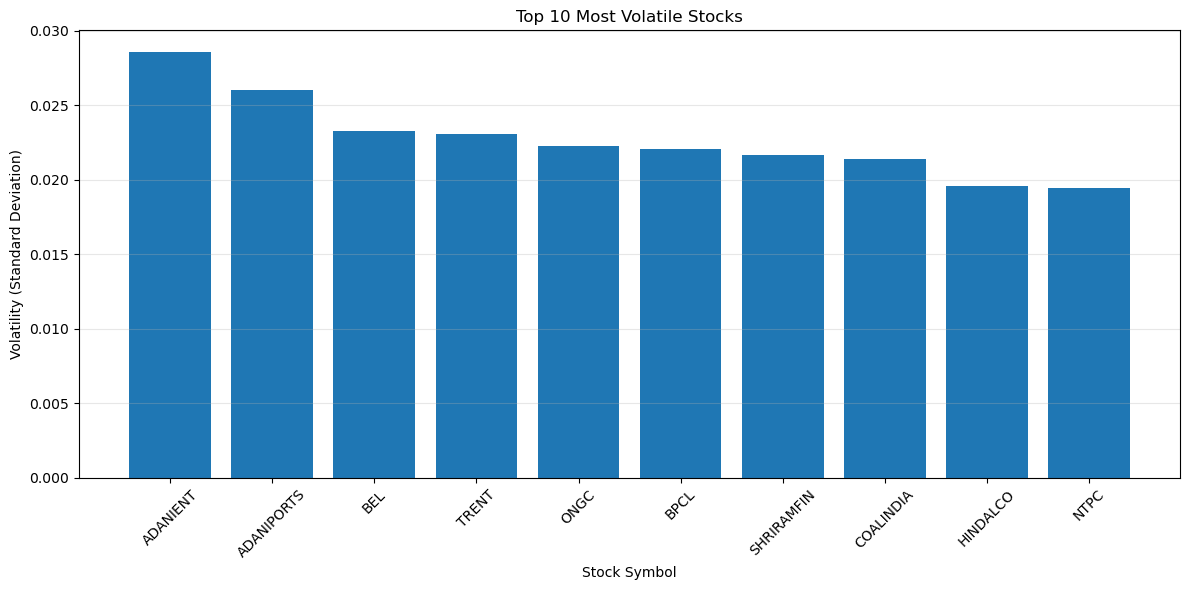

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

symbol_files = [f for f in os.listdir('symbol_csv_files') if f.endswith('.csv')]

def calculate_volatility(symbol_file):
    df = pd.read_csv(f'symbol_csv_files/{symbol_file}')
    df = df.sort_values('date')
    df['daily_return'] = df['close'].pct_change()
    volatility = df['daily_return'].std()
    return volatility

volatility_data = {}
for symbol_file in symbol_files:
    symbol = symbol_file.replace('.csv', '')
    volatility = calculate_volatility(symbol_file)
    volatility_data[symbol] = volatility

top_10_volatile = sorted(volatility_data.items(), key=lambda x: x[1], reverse=True)[:10]
volatility_df = pd.DataFrame(top_10_volatile, columns=['Symbol', 'Volatility'])

print(" TOP 10 MOST VOLATILE STOCKS:")
print("="*50)
print(volatility_df.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.bar(volatility_df['Symbol'], volatility_df['Volatility'])
plt.title('Top 10 Most Volatile Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility (Standard Deviation)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 2. Cumulative Return Over Time

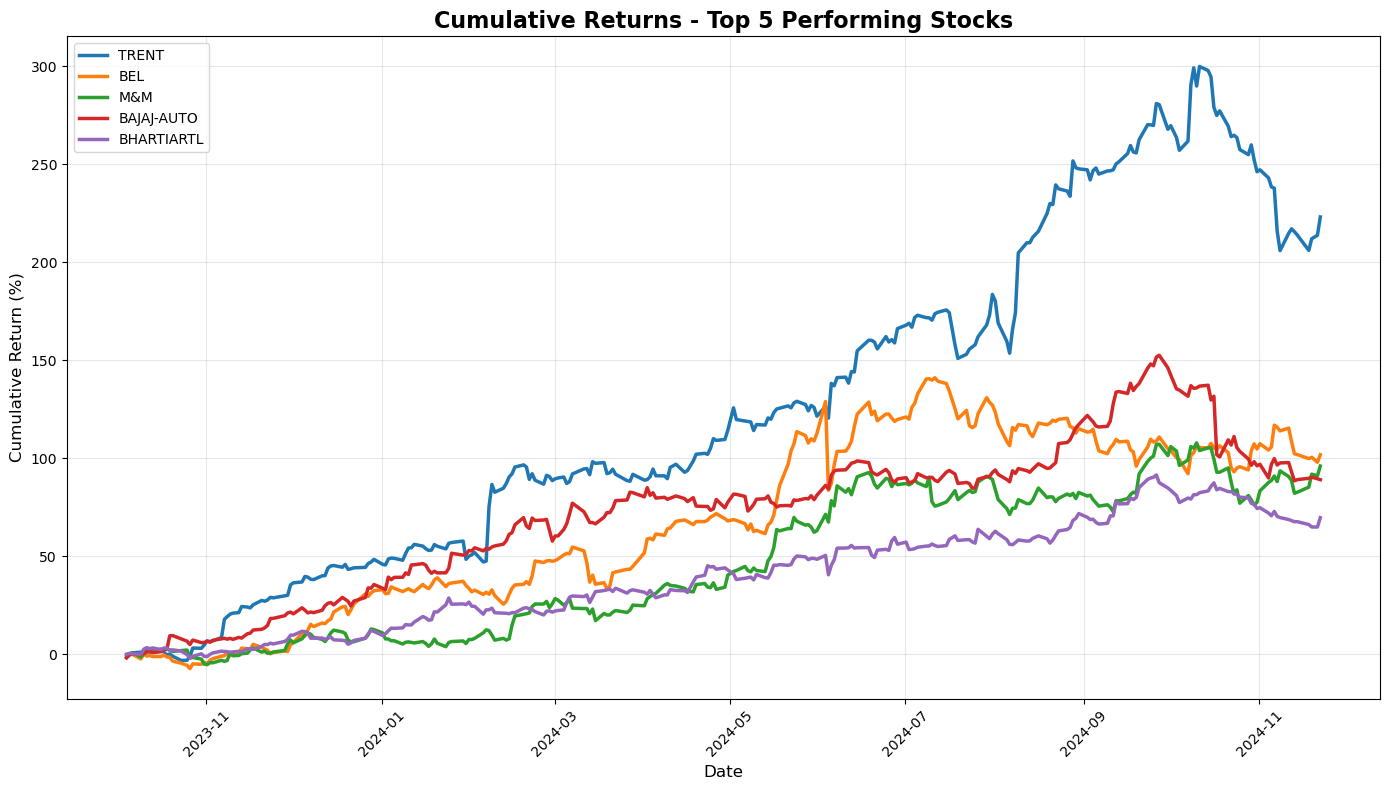

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os

symbol_files = [f for f in os.listdir('symbol_csv_files') if f.endswith('.csv')]

top_5_symbols = ['TRENT', 'BEL', 'M&M', 'BAJAJ-AUTO', 'BHARTIARTL']

plt.figure(figsize=(14, 8))

for symbol in top_5_symbols:
    df = pd.read_csv(f'symbol_csv_files/{symbol}.csv')
    df = df.sort_values('date')
    df['daily_return'] = df['close'].pct_change()
    df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1
    
    plt.plot(pd.to_datetime(df['date']), df['cumulative_return'] * 100, label=symbol, linewidth=2.5)

plt.title('Cumulative Returns - Top 5 Performing Stocks', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Sector-Wise Performance

 SECTOR-WISE PERFORMANCE:
         Sector Avg_Return (%)
      RETAILING        113.31%
        DEFENCE        101.76%
          POWER         60.18%
    AUTOMOBILES         54.53%
         MINING         41.85%
       SOFTWARE         38.28%
         CEMENT         36.97%
         ENERGY         36.56%
  MISCELLANEOUS          36.1%
      ALUMINIUM         35.87%
       TEXTILES         35.78%
PHARMACEUTICALS         31.38%
          STEEL         19.22%
    ENGINEERING         17.25%
      INSURANCE         11.77%
        FINANCE         11.58%
        BANKING         11.38%
 FOOD & TOBACCO          4.32%
           FMCG         -0.96%
         PAINTS        -21.94%


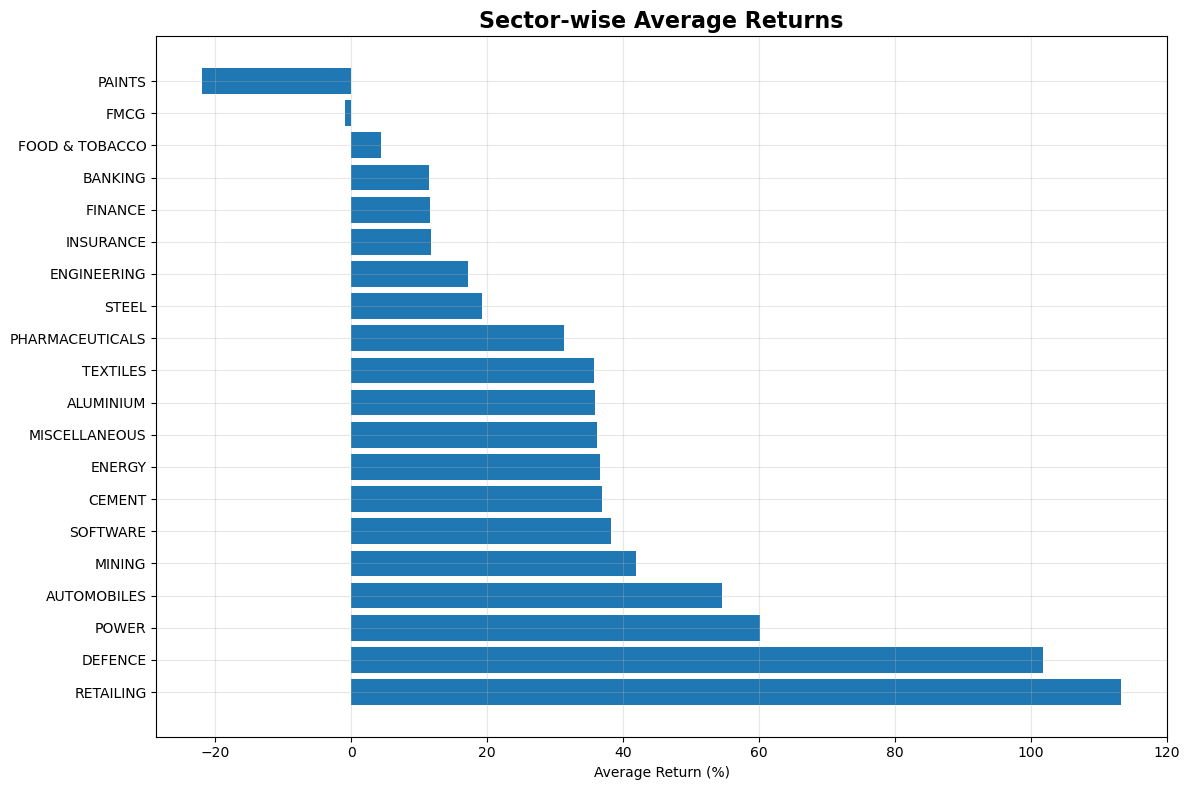

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

symbol_files = [f for f in os.listdir('symbol_csv_files') if f.endswith('.csv')]

def calculate_yearly_return(symbol):
    try:
        df = pd.read_csv(f'symbol_csv_files/{symbol}')
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
            df = df.sort_values('date')
        if len(df) > 1 and 'close' in df.columns:
            start_price = df['close'].iloc[0]
            end_price = df['close'].iloc[-1]
            yearly_return = (end_price - start_price) / start_price
            return yearly_return
    except Exception as e:
        print(f"Error with {symbol}: {e}")
    return 0

yearly_returns = {}
for symbol_file in symbol_files:
    symbol = symbol_file.replace('.csv', '')
    return_pct = calculate_yearly_return(symbol_file)
    yearly_returns[symbol] = return_pct

sector_df = pd.read_csv('Sector_data - Sheet1.csv')

sector_df['Symbol_Clean'] = sector_df['Symbol'].str.split(':').str[1].str.strip()

symbol_to_sector = dict(zip(sector_df['Symbol_Clean'], sector_df['sector']))

sector_returns = {}
for symbol, return_pct in yearly_returns.items():
    sector = symbol_to_sector.get(symbol)
    if sector:
        if sector not in sector_returns:
            sector_returns[sector] = []
        sector_returns[sector].append(return_pct)

sector_avg_returns = {}
for sector, returns in sector_returns.items():
    if returns:
        sector_avg_returns[sector] = np.mean(returns)

sector_performance = pd.DataFrame(list(sector_avg_returns.items()), 
                                columns=['Sector', 'Avg_Return'])

sector_performance = sector_performance.sort_values('Avg_Return', ascending=False)

print(" SECTOR-WISE PERFORMANCE:")
print("="*50)
sector_performance_styled = sector_performance.copy()
sector_performance_styled['Avg_Return (%)'] = (sector_performance_styled['Avg_Return'] * 100).round(2).astype(str) + '%'
print(sector_performance_styled[['Sector', 'Avg_Return (%)']].to_string(index=False))

plt.figure(figsize=(12, 8))
plt.barh(sector_performance['Sector'], sector_performance['Avg_Return'] * 100)
plt.title('Sector-wise Average Returns', fontsize=16, fontweight='bold')
plt.xlabel('Average Return (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Stock Price Correlation

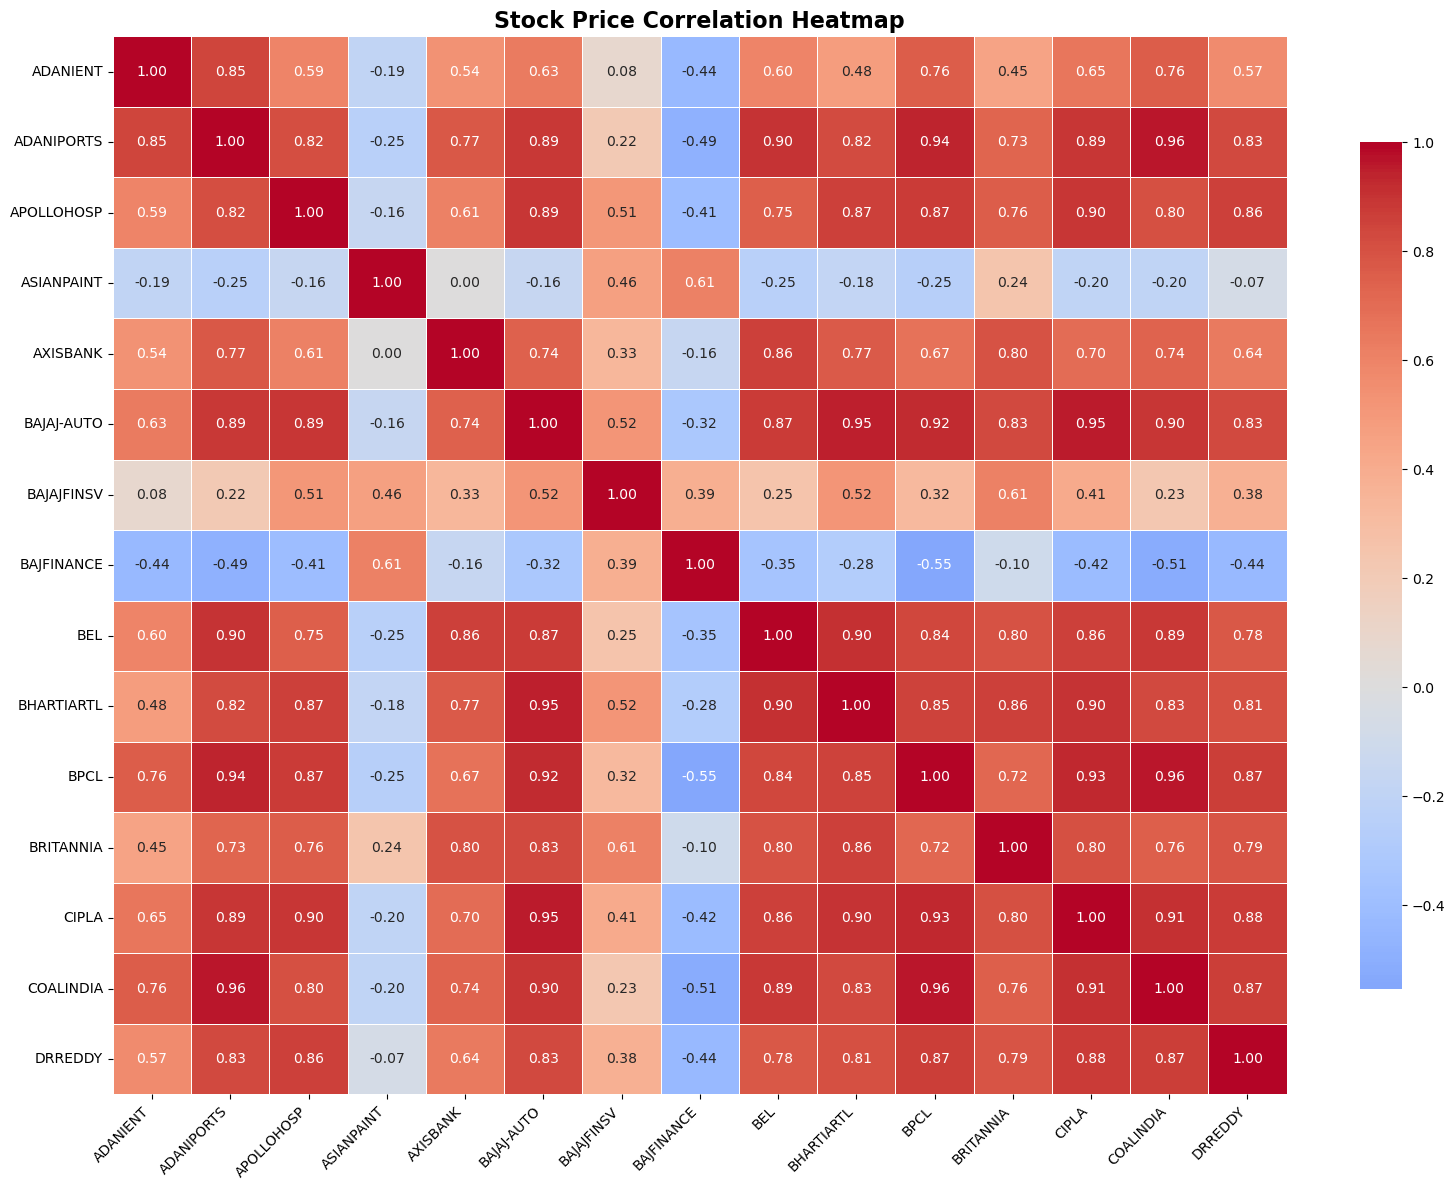

 CORRELATION MATRIX SUMMARY:
Stocks analyzed: 15
Matrix shape: (15, 15)
Average correlation: 0.533


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

symbol_files = [f for f in os.listdir('symbol_csv_files') if f.endswith('.csv')]

closing_prices = pd.DataFrame()

for symbol_file in symbol_files[:15]:
    symbol = symbol_file.replace('.csv', '')
    df = pd.read_csv(f'symbol_csv_files/{symbol_file}')
    df = df.sort_values('date')
    closing_prices[symbol] = df['close']

correlation_matrix = closing_prices.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Stock Price Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(" CORRELATION MATRIX SUMMARY:")
print("="*50)
print(f"Stocks analyzed: {len(correlation_matrix.columns)}")
print(f"Matrix shape: {correlation_matrix.shape}")
print(f"Average correlation: {correlation_matrix.values.mean():.3f}")

## 5. Top 5 Gainers and Losers (Month-wise)

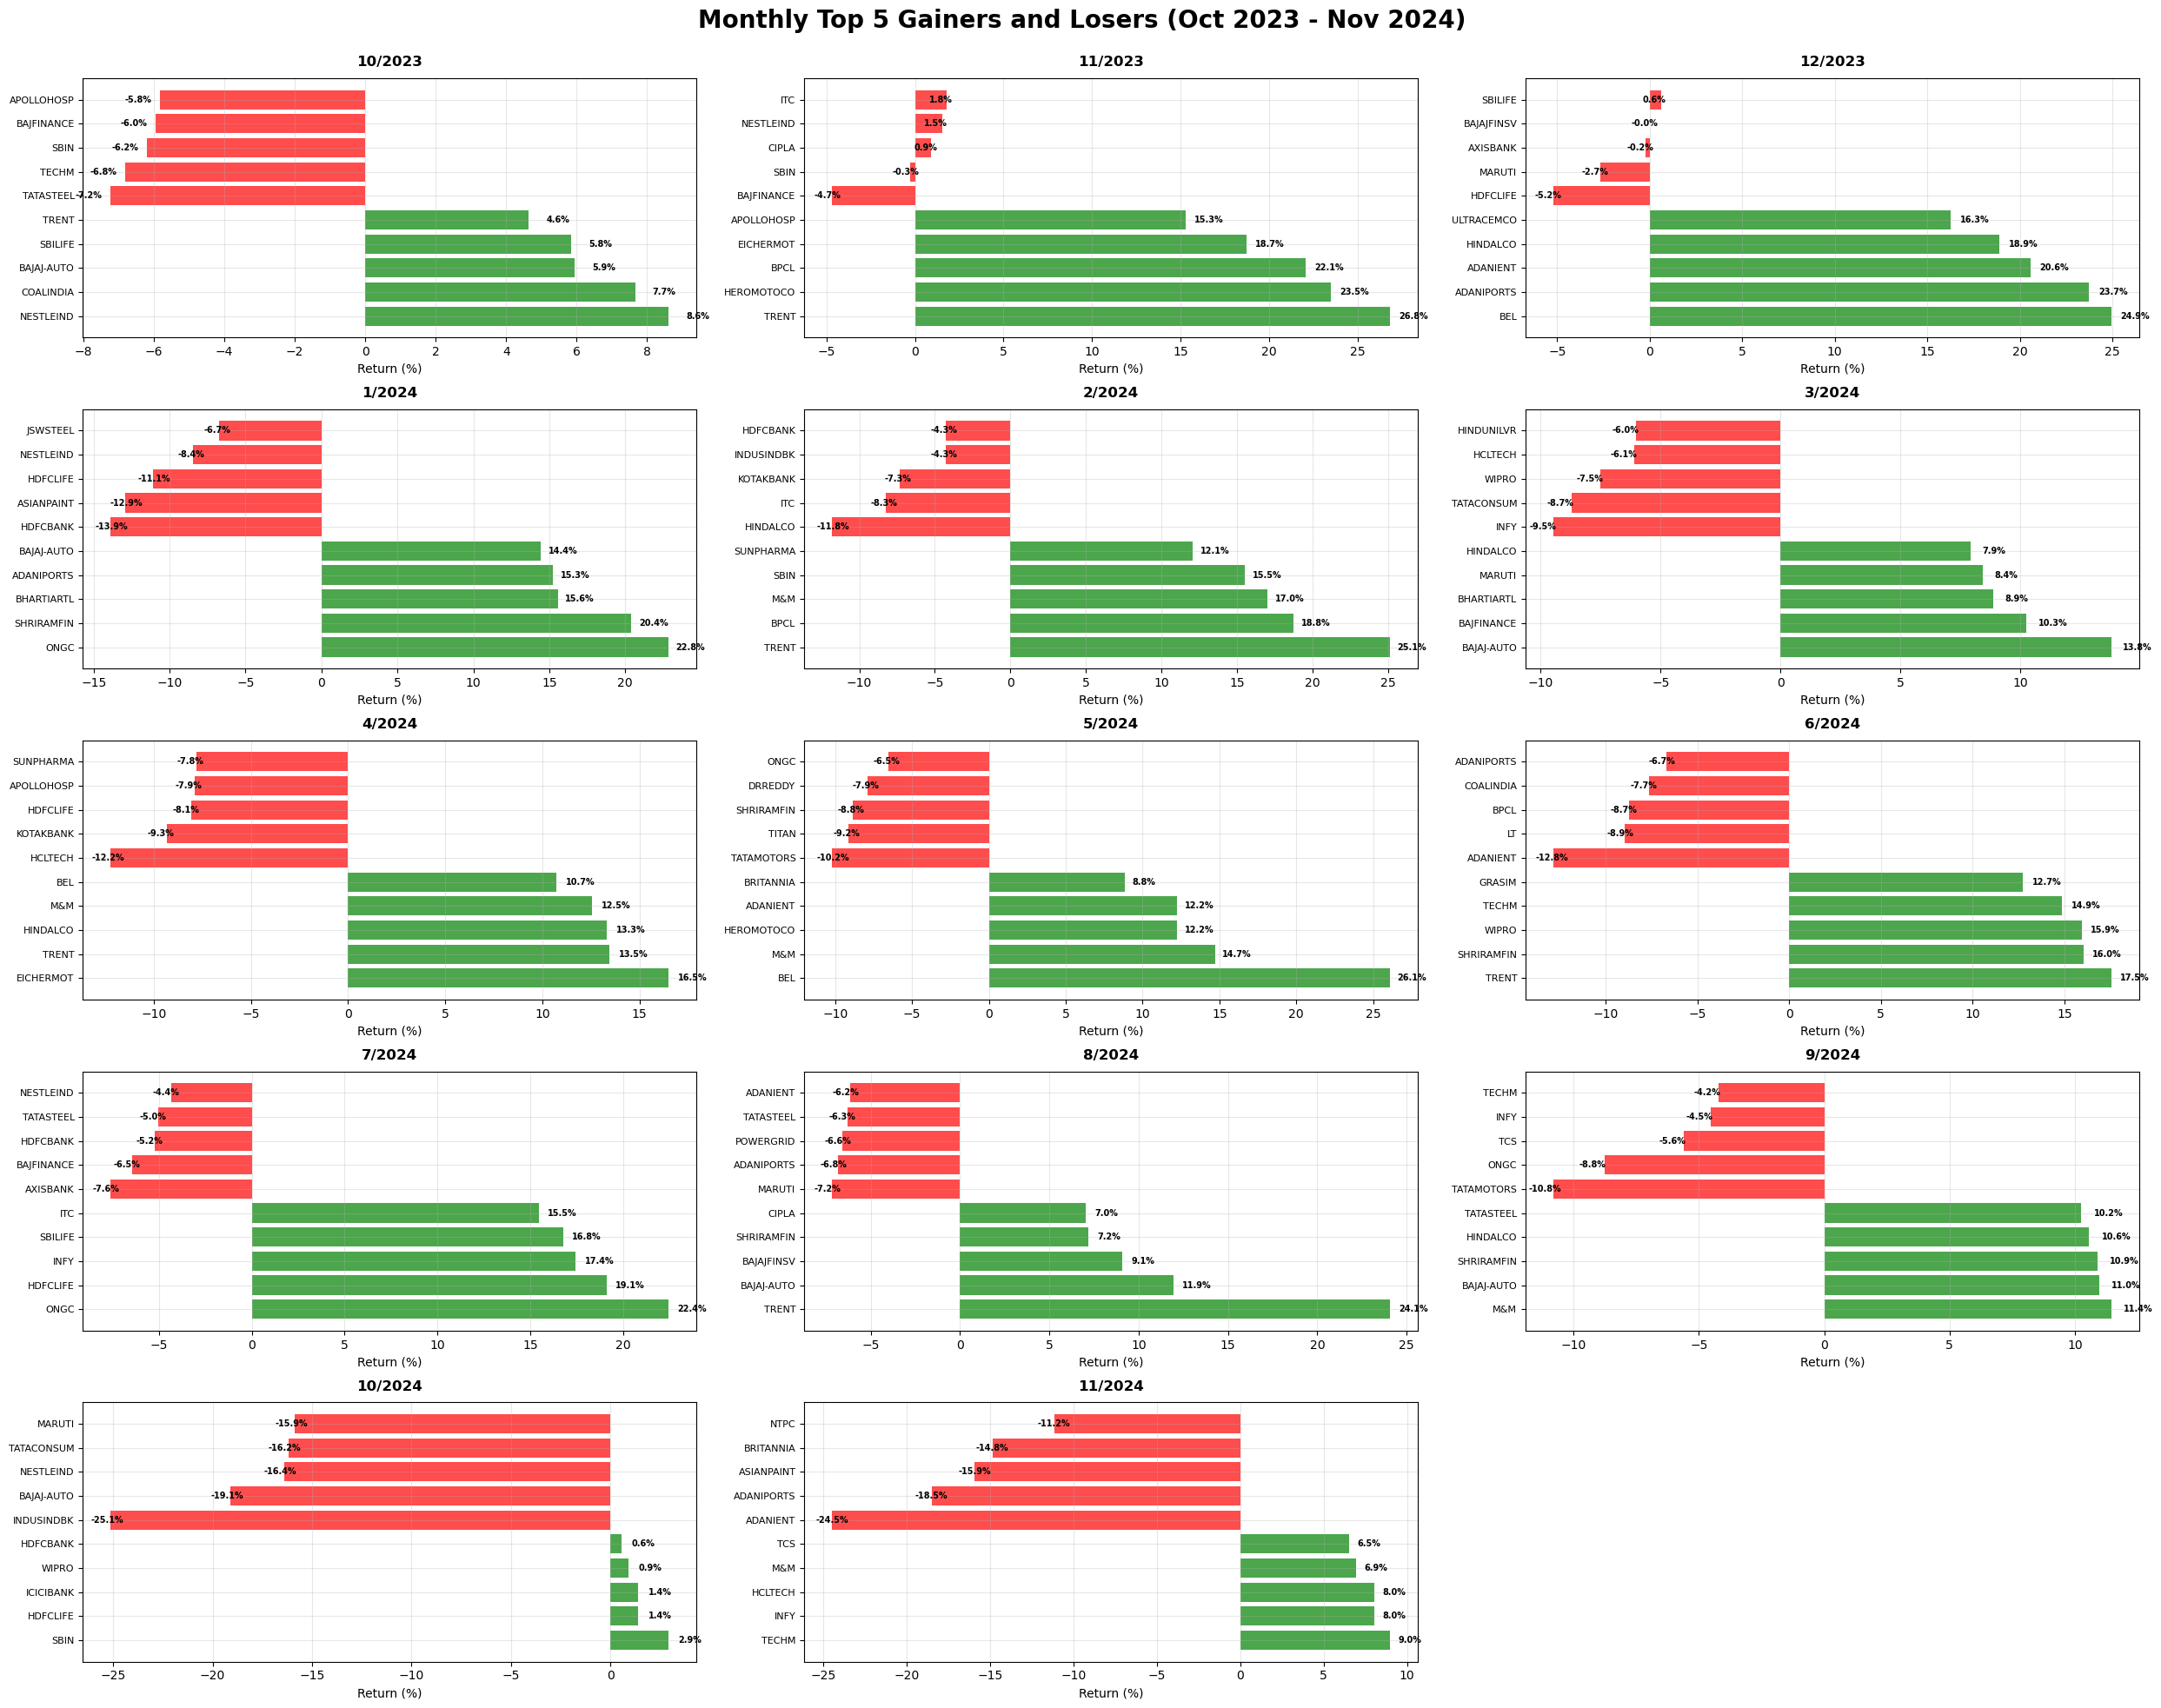

 MONTHLY PERFORMANCE SUMMARY (Oct 2023 - Nov 2024):
10/2023:
   Best: NESTLEIND (8.6%)
   Worst: TATASTEEL (-7.2%)

11/2023:
   Best: TRENT (26.8%)
   Worst: BAJFINANCE (-4.7%)

12/2023:
   Best: BEL (24.9%)
   Worst: HDFCLIFE (-5.2%)

1/2024:
   Best: ONGC (22.8%)
   Worst: HDFCBANK (-13.9%)

2/2024:
   Best: TRENT (25.1%)
   Worst: HINDALCO (-11.8%)

3/2024:
   Best: BAJAJ-AUTO (13.8%)
   Worst: INFY (-9.5%)

4/2024:
   Best: EICHERMOT (16.5%)
   Worst: HCLTECH (-12.2%)

5/2024:
   Best: BEL (26.1%)
   Worst: TATAMOTORS (-10.2%)

6/2024:
   Best: TRENT (17.5%)
   Worst: ADANIENT (-12.8%)

7/2024:
   Best: ONGC (22.4%)
   Worst: AXISBANK (-7.6%)

8/2024:
   Best: TRENT (24.1%)
   Worst: MARUTI (-7.2%)

9/2024:
   Best: M&M (11.4%)
   Worst: TATAMOTORS (-10.8%)

10/2024:
   Best: SBIN (2.9%)
   Worst: INDUSINDBK (-25.1%)

11/2024:
   Best: TECHM (9.0%)
   Worst: ADANIENT (-24.5%)



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

symbol_files = [f for f in os.listdir('symbol_csv_files') if f.endswith('.csv')]

all_data = pd.DataFrame()

for symbol_file in symbol_files:
    symbol = symbol_file.replace('.csv', '')
    df = pd.read_csv(f'symbol_csv_files/{symbol_file}')
    df['symbol'] = symbol
    all_data = pd.concat([all_data, df])

all_data['date'] = pd.to_datetime(all_data['date'])
all_data['month'] = all_data['date'].dt.month
all_data['year'] = all_data['date'].dt.year

all_data = all_data[all_data['date'] >= '2023-10-01']
all_data = all_data[all_data['date'] <= '2024-11-30']

all_data = all_data.sort_values(['symbol', 'date'])

monthly_returns = []

for symbol in all_data['symbol'].unique():
    symbol_data = all_data[all_data['symbol'] == symbol].copy()
    symbol_data = symbol_data.sort_values('date')
    
    for year in symbol_data['year'].unique():
        year_data = symbol_data[symbol_data['year'] == year]
        for month in year_data['month'].unique():
            month_data = year_data[year_data['month'] == month]
            if len(month_data) > 1:
                start_price = month_data['close'].iloc[0]
                end_price = month_data['close'].iloc[-1]
                monthly_return = (end_price - start_price) / start_price
                
                month_name = f"{month}/{year}"
                monthly_returns.append({
                    'symbol': symbol,
                    'month': month_name,
                    'monthly_return': monthly_return
                })

monthly_returns_df = pd.DataFrame(monthly_returns)

month_order = [
    '10/2023', '11/2023', '12/2023', '1/2024', '2/2024', '3/2024',
    '4/2024', '5/2024', '6/2024', '7/2024', '8/2024', '9/2024', '10/2024', '11/2024'
]

available_months = [month for month in month_order if month in monthly_returns_df['month'].unique()]

fig, axes = plt.subplots(5, 3, figsize=(25, 20))
axes = axes.flatten()

for i, month in enumerate(available_months):
    if i >= len(axes):
        break
        
    month_data = monthly_returns_df[monthly_returns_df['month'] == month]
    
    if len(month_data) > 0:
        top_gainers = month_data.nlargest(5, 'monthly_return')
        top_losers = month_data.nsmallest(5, 'monthly_return')
        
        ax = axes[i]
        
        gainers_bars = ax.barh(range(5), top_gainers['monthly_return'] * 100, 
                              color='green', alpha=0.7, label='Gainers')
        losers_bars = ax.barh(range(5, 10), top_losers['monthly_return'] * 100, 
                             color='red', alpha=0.7, label='Losers')
        
        ax.set_title(f'{month}', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Return (%)', fontsize=10)
        ax.set_yticks(range(10))
        ax.set_yticklabels(list(top_gainers['symbol']) + list(top_losers['symbol']), fontsize=8)
        ax.grid(True, alpha=0.3)
        
        for j, (bar, return_val) in enumerate(zip(gainers_bars, top_gainers['monthly_return'])):
            ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                   f'{return_val*100:.1f}%', va='center', fontsize=7, fontweight='bold')
        
        for j, (bar, return_val) in enumerate(zip(losers_bars, top_losers['monthly_return'])):
            ax.text(bar.get_width() - 1.0, bar.get_y() + bar.get_height()/2, 
                   f'{return_val*100:.1f}%', va='center', fontsize=7, fontweight='bold',
                   color='white' if return_val < -5 else 'black')

for j in range(len(available_months), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Monthly Top 5 Gainers and Losers (Oct 2023 - Nov 2024)', 
             fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

print(" MONTHLY PERFORMANCE SUMMARY (Oct 2023 - Nov 2024):")
print("="*60)
for month in available_months:
    month_data = monthly_returns_df[monthly_returns_df['month'] == month]
    if len(month_data) > 0:
        best_stock = month_data.nlargest(1, 'monthly_return').iloc[0]
        worst_stock = month_data.nsmallest(1, 'monthly_return').iloc[0]
        print(f"{month}:")
        print(f"   Best: {best_stock['symbol']} ({best_stock['monthly_return']*100:.1f}%)")
        print(f"   Worst: {worst_stock['symbol']} ({worst_stock['monthly_return']*100:.1f}%)")
        print()